In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rainfall_df = pd.read_csv("../data/worldbank/pr_1901_2016_PHL.csv")
temperature_df = pd.read_csv("../data/worldbank/tas_1901_2016_PHL.csv")
global_temp = pd.read_csv("../data/datahub.io/global-temp/data/annual_csv.csv")
monthly_global_temp = pd.read_csv("../data/datahub.io/global-temp/data/monthly_csv.csv")

In [100]:
from_year = 1910
to_year = 2016

tmp_mean_per_year = temperature_df[(rainfall_df['year'] >= from_year) & (rainfall_df['year'] <= to_year)]\
    .groupby(temperature_df['year'])[['year', 'temperature_celsius']]\
    .transform('mean')\
    .drop_duplicates()

rf_mean_per_year = rainfall_df[(rainfall_df['year'] >= from_year) & (rainfall_df['year'] <= to_year)]\
    .groupby(rainfall_df['year'])[['year', 'rainfall_mm']]\
    .transform('mean')\
    .drop_duplicates()

n = pd.DataFrame(tmp_mean_per_year)
n['rainfall_mm'] = rf_mean_per_year['rainfall_mm']

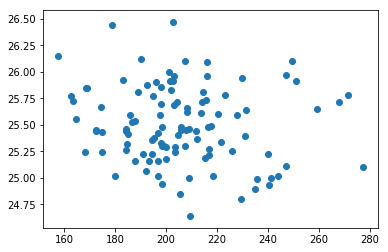

In [102]:
plt.scatter(n['rainfall_mm'], n['temperature_celsius'])

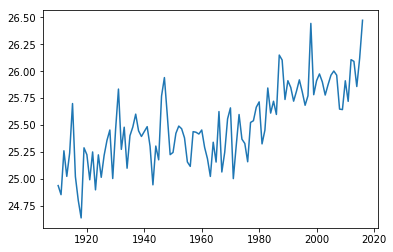

In [104]:
plt.plot(n['year'], n['temperature_celsius'])